In [1]:
# https://github.com/NielsRogge/Transformers-Tutorials/blob/master/ViTMAE/ViT_MAE_visualization_demo.ipynb

In [2]:
import random
import numpy as np

import torch
from torch.utils.data import DataLoader

from transformers import ViTMAEConfig, ViTMAEForPreTraining

from src.plotters import plot_mae
from src.utils import select_device, extract_mae
from src.datasets import CustomDataset, collate_fn_valid_test

%reload_ext autoreload
%autoreload 2

device = select_device()

In [3]:
vitmaeconfig = {
    'image_size': 64,
    'patch_size': 4,
    'num_channels': 16,
    'mask_ratio': 0.75,
    #
    'hidden_size':128,
    'intermediate_size': 256,
    'num_hidden_layers': 6,
    'num_attention_heads': 4,
    #
    'hidden_dropout_prob': 0.0,
    'attention_probs_dropout_prob': 0.0,
    #
    'decoder_hidden_size': 64,
    'decoder_intermediate_size': 128,
    'decoder_num_hidden_layers': 2,
    'decoder_num_attention_heads': 4,
}

MODEL_PATH = "model.pth"
checkpoint = torch.load(MODEL_PATH, map_location=device)

model = ViTMAEForPreTraining(config=ViTMAEConfig(**vitmaeconfig)).to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [4]:
test_data = np.load("/Users/martin/Sites/datasets/alentic/mae/testing_dataset.npy")
test_dataset = CustomDataset(test_data)

test_dataloader = DataLoader(
        test_dataset,
        batch_size=128,
        shuffle=True,
        collate_fn=collate_fn_valid_test
    )

In [5]:
patched_images = []
for batch in test_dataloader:
    patched_images.append(batch)
    
patched_images = torch.cat(patched_images)
random.shuffle(patched_images)
print(patched_images.shape)

dataset = CustomDataset(patched_images)

torch.Size([36864, 16, 64, 64])


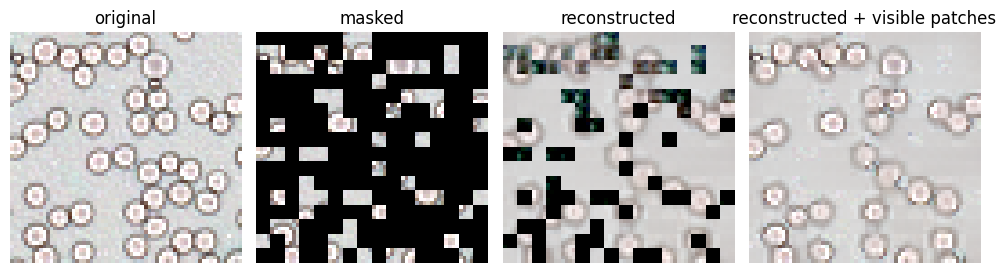

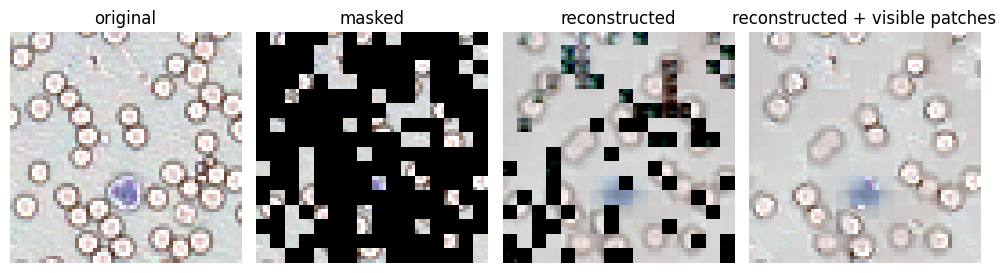

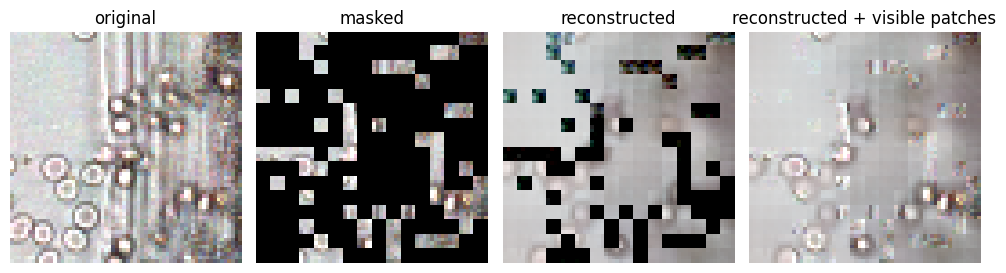

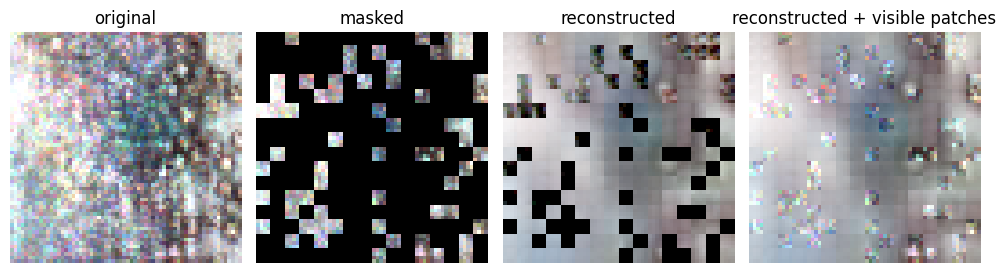

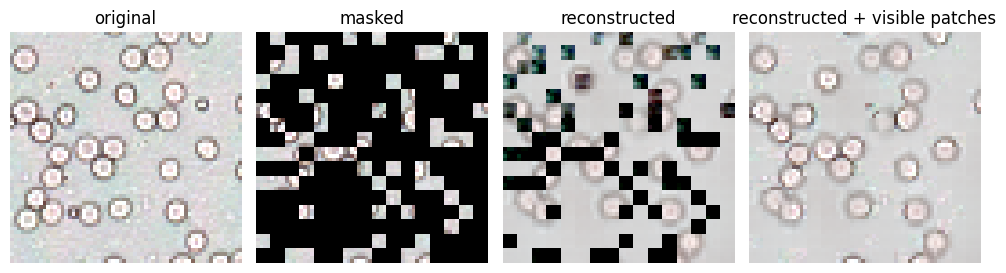

In [7]:
for i in range(5):
    image_index = random.randint(0, len(dataset) - 1)
    mae_image_results = extract_mae(model, dataset, image_index=image_index, device=device, denormalize=False)
    plot_mae(mae_image_results)